In [ ]:
#credit https://github.com/Doraemonzzz/ML-Foundation-and-ML-Techniques/tree/master/hw1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [73]:
np.sign(0.3)

np.random.seed(0)
x = np.random.rand(3,3)
w = np.ones(3)
z = [[3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]]
np.random.shuffle(z)
z


[[0, 1, 2], [6, 7, 8], [3, 4, 5]]

In [46]:
def Judge(X, y, w):
    """
    v判别函数，判断所有数据是否分类完成
    """
    n = X.shape[0]
    #判断是否分类完成
    num = np.sum(X.dot(w) * y > 0)
    #x 400*5 w 5*1 y 400*1 
    #x.dot * w is element times element
    return num == n

def preprocess(data):
    """
    v数据预处理
    """
    #获取维度
    n, d = data.shape
    #retrive all but last column
    X = data[:, :-1]
    ##add 1 at first col
    X = np.c_[np.ones(n), X]
    #rerive last column
    y = data[:, -1]
    
    return X, y


def count(X, y, w):
    """
    v统计错误数量
    """
    num = np.sum(X.dot(w) * y <= 0)
    return np.sum(num)

def PLA(X, y, eta=1, max_step=np.inf):
    """
    vPLA算法，X，y为输入数据，eta为步长，默认为1，max_step为最多迭代次数，默认为无穷
    """
    #获取维度
    n, d = X.shape
    #初始化
    w = np.zeros(d)
    #记录迭代次数
    t = 0
    #记录元素的下标
    i = 0
    #记录最后一个错误的下标
    last = 0
    while not(Judge(X, y, w)) and t < max_step:
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            #xi w inner product smaller * y smaller than zero == wrong line
            #迭代次数增加
            t += 1
            w += eta * y[i] * X[i, :]
            #更新最后一个错误
            last = i
        
        #移动到下一个元素
        i += 1
        #如果达到n，则重置为0
        if i == n:
            i = 0
    
    return t, last, w

def Pocket_PLA(X, y, eta=1, max_step=np.inf):
    """
    vPocket_PLA算法，X，y为输入数据，eta为步长，默认为1，max_step为最多迭代次数，默认为无穷
    """
    #获得数据维度
    n, d = X.shape
    #初始化
    w = np.zeros(d)
    #记录最优向量
    w0 = np.zeros(d)
    #记录次数
    t = 0
    #记录最少错误数量
    error = count(X, y, w0)
    #记录元素的下标
    i = 0
    while (error != 0 and t < max_step):
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            w += eta * y[i] * X[i, :]
            #迭代次数增加
            t += 1
            #记录当前错误
            error_now = count(X, y, w)
            if error_now < error:
                error = error_now
                w0 = np.copy(w)
                #so w0 won't be affected by change in w


        #移动到下一个元素
        i += 1
        #如果达到n，则重置为0
        if i == n:
            i = 0
    return error, w0

def f1(g, X, y, n, eta=1, max_step=np.inf):
    """
    v运行g算法n次，统计平均迭代次数，eta为步长，默认为1，max_step为最多迭代次数，默认为无穷
    """
    result = []
    data = np.c_[X, y]
    for i in range(n):
        np.random.shuffle(data)
        #row interchange
        X = data[:, :-1]
        y = data[:, -1]
        result.append(g(X, y, eta=eta, max_step=max_step)[0])
        
    plt.hist(result, normed=True)
    plt.xlabel("迭代次数")
    plt.title("平均运行次数为"+str(np.mean(result)))
    plt.show()
    
def f2(g, X1, y1, X2, y2, n, eta=1, max_step=np.inf):
    """
    训练n次，每次在(X1, y1)上利用g算法训练，在(X2, y2)上评估结果，
    eta为步长，默认为1，max_step为最多迭代次数，默认为无穷
    """
    result = []
    data = np.c_[X1, y1]
    m = X2.shape[0]
    for i in range(n):
        np.random.shuffle(data)
        #row interchange
        X = data[:, :-1]
        y = data[:, -1]
        w = g(X, y, eta=eta, max_step=max_step)[-1]
        result.append(count(X2, y2, w) / m)

    plt.hist(result, normed=True)
    plt.xlabel("错误率")
    plt.title("平均错误率为"+str(np.mean(result)))
    plt.show()

In [47]:
#读取数据
data = np.genfromtxt("data.txt")
#获取维度
n, d = data.shape
#分离X
X = data[:, :-1]
#添加偏置项1
X = np.c_[np.ones(n), X]
#分离y
y = data[:, -1]

#problem 15    
print(PLA(X, y))

(45, 135, array([-3.       ,  3.0841436, -1.583081 ,  2.391305 ,  4.5287635]))


c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:113: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36816 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\amand\appdata\local\programs\python\python37\lib\site-packages\matplo

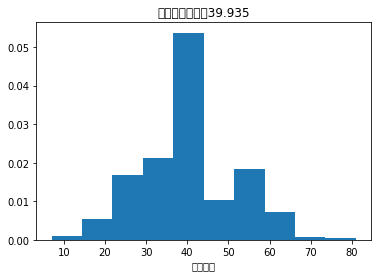

In [48]:
#problem 16
f1(PLA, X, y, 2000, 1)

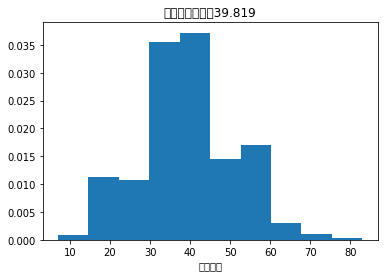

In [6]:
#problem 17
f1(PLA, X, y, 2000, 0.5)

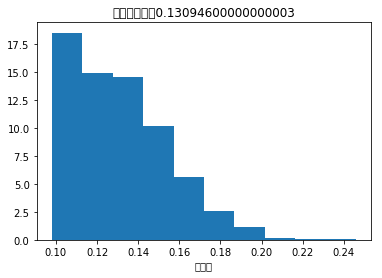

In [7]:
data_train = np.genfromtxt("hw1_18_train.txt")
data_test = np.genfromtxt("hw1_18_test.txt")
#Load data from a text file, with missing values handled as specified.
#Each line past the first skip_header lines is split at the delimiter character, 
#and characters following the comments character are discarded.

X_train, y_train = preprocess(data_train)
X_test, y_test = preprocess(data_test)

#problem 18
f2(Pocket_PLA, X_train, y_train, X_test, y_test, 2000, max_step=50)

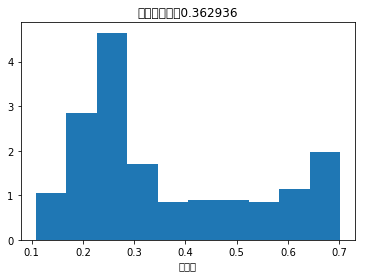

In [10]:
#problem 19
result = f2(PLA, X_train, y_train, X_test, y_test, 2000, 1, max_step=50)

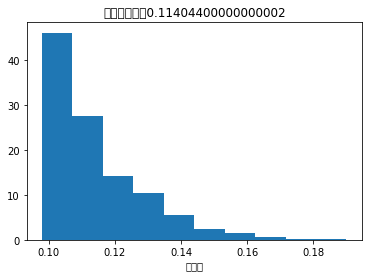

In [11]:
#problem 20
f2(Pocket_PLA, X_train, y_train, X_test, y_test, 2000, max_step=100)